In [1]:
import re
from datetime import datetime
root = "/rsrch5/home/plm/yshokrollahi/project4/RawDataset"
# Define the file path
file_path = f'{root}/annotaions/MS016S1.txt'

# Function to safely parse coordinate data
def parse_coordinates(coord_string):
    try:
        coordinates = eval(coord_string)
        if isinstance(coordinates, list) and all(isinstance(coord, tuple) for coord in coordinates):
            return coordinates
    except:
        return []

# Function to parse a line
def parse_line(line):
    # Use regex to split line while ignoring commas within square brackets
    parts = re.split(r',(?![^\[\]]*\])', line.strip())

    if len(parts) < 6:
        return None, 'Insufficient data'

    try:
        active = int(parts[0])
        index = int(parts[1])
        data_type = int(parts[2])
        coordinates = parse_coordinates(parts[3])
        colour = parts[4]
        fixed_value = int(parts[5])
    except ValueError as e:
        return None, str(e)

    return {
        'Active': active,
        'Index': index,
        'Type': data_type,
        'Coordinates': coordinates,
        'Color': colour,
        'Fixed Value': fixed_value
    }, None

# Main function to read and categorize data
def read_and_categorize(file_path):
    categorized_data = []
    error_count = 0

    try:
        with open(file_path, 'r') as file:
            for line in file:
                parsed_data, error = parse_line(line)
                if parsed_data:
                    categorized_data.append(parsed_data)
#                     print("Data parsed successfully:", parsed_data)
                elif error:
                    print(f"Skipping line due to parsing error: {line}. Error: {error}")
                    error_count += 1
    except FileNotFoundError:
        print(f"File not found: {file_path}")
    except Exception as e:
        print(f"An error occurred while reading the file: {e}")

    return categorized_data, error_count

# Read and print the categorized data
categorized_data, error_count = read_and_categorize(file_path)

if not categorized_data and error_count == 0:
    print("No data was parsed successfully.")
else:
    print(f"Total number of parsing errors: {error_count}")


Total number of parsing errors: 0


In [2]:
cd = 0
panck = 0
others = 0
cd_less = 0
for i in range(len(categorized_data)):
    if categorized_data[i]['Color'] == "#00ffff" or categorized_data[i]['Color'] == "#0000ff":
        cd += 1
    elif categorized_data[i]['Color'] == '#c0c0c0':
        cd_less += 1
    elif categorized_data[i]['Color'] == '#ff00ff':
        panck += 1
    else:
        others += 1

In [3]:
print('cd45+ 95%: ' + str(cd))
print('cd45+ 70%: ' + str(cd_less))
print('panck: ' + str(panck))
print('others: ' + str(others))

cd45+ 95%: 515
cd45+ 70%: 0
panck: 531
others: 540


In [4]:
points_normalized = []
points_colors = []
for i in range(len(categorized_data)):
    points_normalized.append(categorized_data[i]['Coordinates'][0])
    points_colors.append(categorized_data[i]['Color'])  # Extracting color

    
max(points_normalized, key=lambda x:x[0])


(0.7447405186181105, 0.586109861638924)

all points: 1586
 points shown: 1586


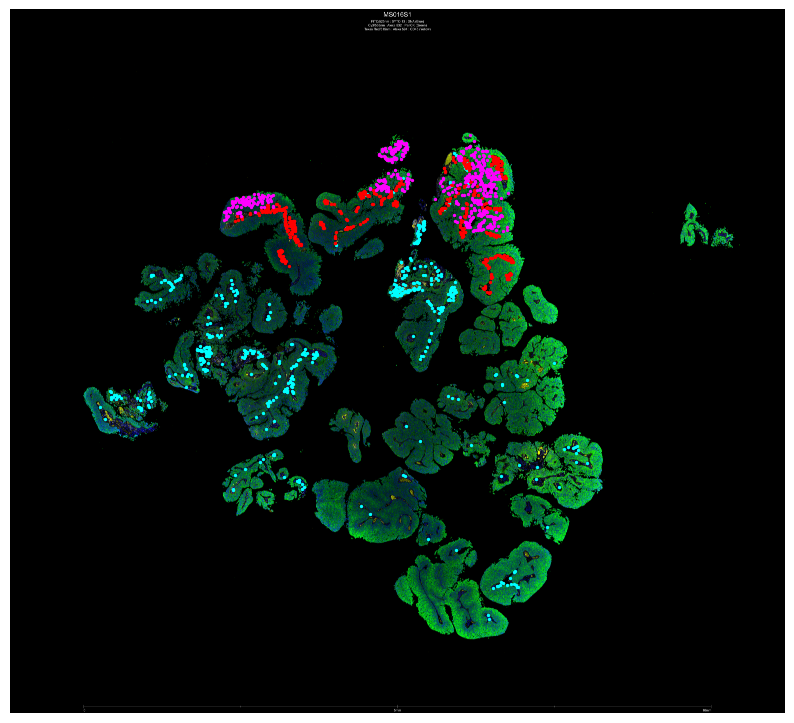

In [5]:
import cv2
import matplotlib.pyplot as plt

# Path to your image
image_path = f"{root}/images/MS016S1.png"
#path to new image with raw format
#image_path = f"{root}/images/MS016S1 OME.ome.tiff"

# Load the image using OpenCV
image = cv2.imread(image_path)

# Get the width and height of the image
height, width, _ = image.shape

# Lists to hold normalized points (x, y) and their respective colors
points_normalized = []
points_colors = []

# Extract coordinates and colors from categorized_data
for i in range(len(categorized_data)):
    points_normalized.append(categorized_data[i]['Coordinates'][0])
    points_colors.append(categorized_data[i]['Color'])  # Extracting color

# Convert normalized coordinates to pixel values
points_pixel = [(int(x * width), int(y * width)) for x, y in points_normalized]

plt.figure(figsize=(10, 10))

# Display the image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

print(f'all points: {len(points_pixel)}')
points_shown = 0

# Plot the points on the image with their respective colors
for (x, y), color in zip(points_pixel, points_colors):
    plt.scatter(x, y, c=color, marker='o', s=2)  # Using extracted color for each point
    points_shown += 1

print(f' points shown: {points_shown}')

plt.axis("off")
# plt.savefig("/Users/yshokrollahi/Desktop/MD/Project3/dataset/IF/ROIs/28/MS028S1.png")    
# Show the image with points
plt.show()


In [6]:
import re
import cv2
import matplotlib.pyplot as plt

root = "/rsrch5/home/plm/yshokrollahi/project4/RawDataset"
file_path = f'{root}/annotaions/MS023S1.txt'
old_image_path = f"{root}/images/MS023S1.png"
new_image_path = f"{root}/ome-png/MS023S1.png"

# Function to safely parse coordinate data
def parse_coordinates(coord_string):
    try:
        coordinates = eval(coord_string)
        if isinstance(coordinates, list) and all(isinstance(coord, tuple) for coord in coordinates):
            return coordinates
    except:
        return []

# Function to parse a line
def parse_line(line):
    parts = re.split(r',(?![^\[\]]*\])', line.strip())
    if len(parts) < 6:
        return None, 'Insufficient data'
    try:
        active = int(parts[0])
        index = int(parts[1])
        data_type = int(parts[2])
        coordinates = parse_coordinates(parts[3])
        colour = parts[4]
        fixed_value = int(parts[5])
    except ValueError as e:
        return None, str(e)
    return {
        'Active': active,
        'Index': index,
        'Type': data_type,
        'Coordinates': coordinates,
        'Color': colour,
        'Fixed Value': fixed_value
    }, None

# Main function to read and categorize data
def read_and_categorize(file_path):
    categorized_data = []
    error_count = 0
    try:
        with open(file_path, 'r') as file:
            for line in file:
                parsed_data, error = parse_line(line)
                if parsed_data:
                    categorized_data.append(parsed_data)
                elif error:
                    print(f"Skipping line due to parsing error: {line}. Error: {error}")
                    error_count += 1
    except FileNotFoundError:
        print(f"File not found: {file_path}")
    except Exception as e:
        print(f"An error occurred while reading the file: {e}")
    return categorized_data, error_count

# Read and print the categorized data
categorized_data, error_count = read_and_categorize(file_path)
if not categorized_data and error_count == 0:
    print("No data was parsed successfully.")
else:
    print(f"Total number of parsing errors: {error_count}")

# Load the old and new images
old_image = cv2.imread(old_image_path)
new_image = cv2.imread(new_image_path)

# Get the width and height of the images
old_height, old_width, _ = old_image.shape
new_height, new_width, _ = new_image.shape

# Calculate scaling factor based on width
scale_factor = new_width / old_width

# Lists to hold points and their respective colors
points_normalized = []
points_colors = []




Total number of parsing errors: 0


In [7]:
# Extract coordinates and colors from categorized_data
for i in range(len(categorized_data)):
    points_normalized.append(categorized_data[i]['Coordinates'][0])
    points_colors.append(categorized_data[i]['Color'])  # Extracting color

# Convert coordinates to pixel values for the old image
points_pixel_old = [(int(x * old_width), int(y * old_width)) for x, y in points_normalized]

# Convert coordinates to pixel values for the new image using the scale factor
points_pixel_new = [(int(x * new_width), int(y * new_height)) for x, y in points_normalized]



In [15]:
points_pixel_old[0][0]

7037

In [16]:
points_pixel_old[0][1]

1956

In [17]:
points_pixel_new[0][0]

10969

In [18]:
points_pixel_new[0][1]

3050

In [8]:
print(old_width)
print(new_width)

print(old_height)
print(new_height)

print(new_width / old_width)
print(new_height / old_height)


10511
16384
17639
16384
1.5587479783084388
0.9288508418844605


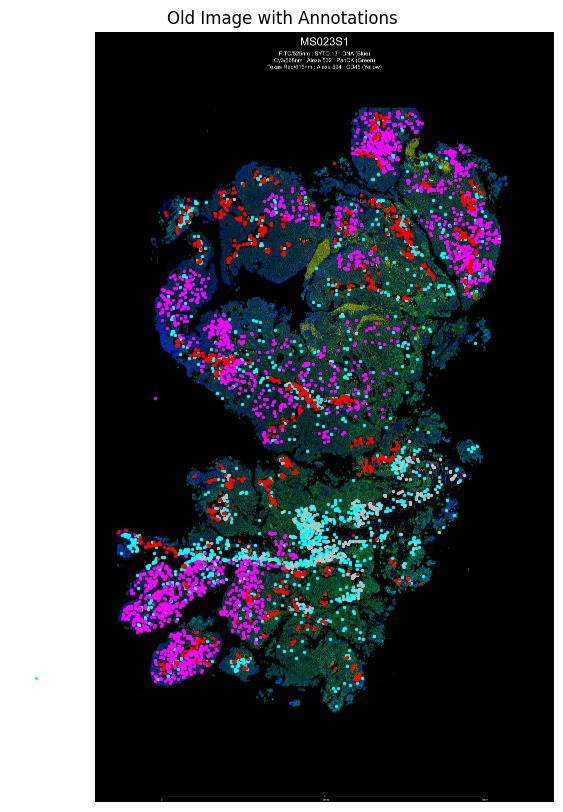

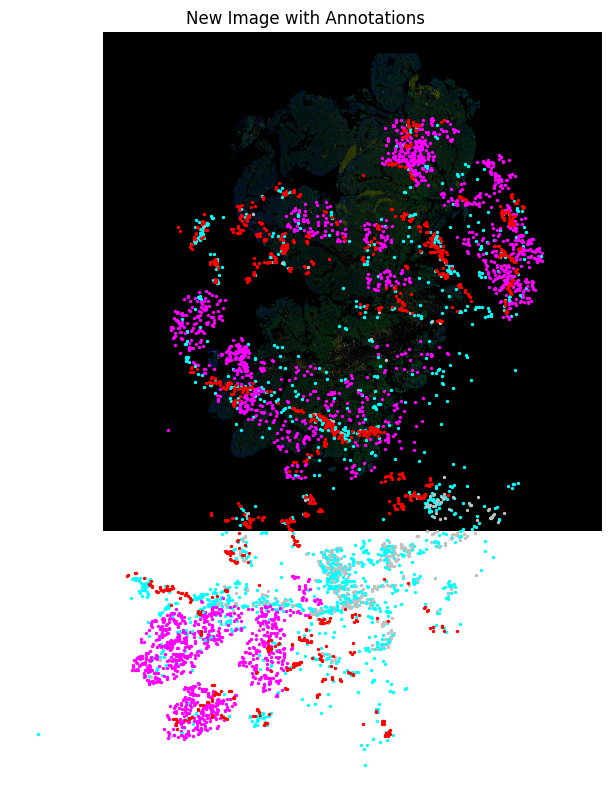

In [9]:
# Plot points on the old image
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(old_image, cv2.COLOR_BGR2RGB))
for (x, y), color in zip(points_pixel_old, points_colors):
    plt.scatter(x, y, c=color, marker='o', s=2)
plt.title("Old Image with Annotations")
plt.axis("off")
plt.show()

# Plot points on the new image
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
for (x, y), color in zip(points_pixel_new, points_colors):
    plt.scatter(x, y, c=color, marker='o', s=2)
plt.title("New Image with Annotations")
plt.axis("off")
plt.show()

##Ome tiff to png 

In [156]:
import tifffile as tf
import numpy as np
import imageio
import os

# Define paths
root = "/rsrch5/home/plm/yshokrollahi/project4/RawDataset"
ome_tiff_path = f"{root}/images/MOS044S1 OME.ome.tiff"
output_folder = f"{root}/ome-png"
os.makedirs(output_folder, exist_ok=True)

# Read the OME-TIFF file
with tf.TiffFile(ome_tiff_path) as tif:
    # Extract image data from the file
    image_data = tif.asarray()
    print("Shape of the image data:", image_data.shape)

    # Print metadata for each channel
    for idx, (channel_info, data) in enumerate(zip(tif.ome_metadata.images[0].pixels.channels, image_data)):
        print(f"Channel {idx}:")
        print(f"  Name: {channel_info.name}")
        print(f"  Fluor: {channel_info.fluor}")
        print(f"  Emission Wavelength: {channel_info.emission_wavelength}")
        print(f"  Excitation Wavelength: {channel_info.excitation_wavelength}")

    # Define color mapping for each channel: Channel 0 (blue), Channel 1 (green), Channel 2 (yellow)
    color_map = {
        0: np.array([0, 0, 255]),  # Blue
        1: np.array([0, 255, 0]),  # Green
        2: np.array([255, 255, 0]) # Yellow
    }

    # Create a composite image
    composite_image = np.zeros((*image_data.shape[1:], 3), dtype=np.uint8)
    for i, data in enumerate(image_data):
        for c in range(3):
            composite_image[..., c] += np.clip(data * color_map[i][c], 0, 255).astype(np.uint8)

    # Save the composite image
    composite_path = os.path.join(output_folder, "composite_image.png")
    imageio.imwrite(composite_path, composite_image)
    print(f"Composite image saved at {composite_path}")



Shape of the image data: (3, 49152, 32768)


AttributeError: 'str' object has no attribute 'images'

In [155]:
import tifffile
import ome_types
import os
import numpy as np
from PIL import Image

# Paths
root = "/rsrch5/home/plm/yshokrollahi/project4/RawDataset"
ome_tiff_path = f"{root}/images/MOS044S1 OME.ome.tiff"
output_folder = f"{root}/ome-png"

# Ensure the output folder exists
os.makedirs(output_folder, exist_ok=True)

# Color assignments
color_map = {
    "FITC/525nm": (0, 0, 255),    # Blue
    "Cy3/568nm": (0, 255, 0),     # Green
    "Texas Red/615nm": (255, 255, 0)  # Yellow
}

# Read the OME-TIFF file
with tifffile.TiffFile(ome_tiff_path) as tif:
    # Get the OME metadata
    ome_meta = ome_types.from_xml(tif.ome_metadata)
    
    # Read the image data
    data = tif.asarray()

    # Print basic information
    print(f"Image Name: {ome_meta.images[0].name}")
    print(f"Dimensions: {ome_meta.images[0].pixels.size_c} channels, "
          f"{ome_meta.images[0].pixels.size_x}x{ome_meta.images[0].pixels.size_y} pixels, "
          f"{ome_meta.images[0].pixels.size_z} Z-slices, "
          f"{ome_meta.images[0].pixels.size_t} timepoints")
    print(f"Data type: {data.dtype}")
    print(f"Data range: {data.min()} to {data.max()}")

    # Create an empty RGB image
    composite_img = np.zeros((data.shape[1], data.shape[2], 3), dtype=np.float32)

    # Process each channel
    for i, channel in enumerate(ome_meta.images[0].pixels.channels):
        print(f"\nProcessing Channel {i}:")
        print(f"  Name: {channel.name}")
        
        # Extract the channel data
        channel_data = data[i] if data.ndim == 3 else data[0, i]
        
        # Normalize the data to 0-1 range
        channel_min = np.percentile(channel_data, 1)  # 1st percentile as minimum
        channel_max = np.percentile(channel_data, 99)  # 99th percentile as maximum
        channel_data_normalized = np.clip((channel_data - channel_min) / (channel_max - channel_min), 0, 1)
        
        # Assign color based on the channel name
        for name, color in color_map.items():
            if name.lower() in channel.name.lower():
                for j in range(3):
                    composite_img[:,:,j] += channel_data_normalized * (color[j] / 255)
                break
        else:
            print(f"  Warning: No color match found for {channel.name}. Adding as grayscale.")
            composite_img += np.stack((channel_data_normalized,) * 3, axis=-1)

    # Normalize the composite image to 0-1 range
    composite_img = np.clip(composite_img / composite_img.max(), 0, 1)

    # Apply gamma correction for better visibility
    gamma = 0.5
    composite_img = np.power(composite_img, gamma)

    # Convert to 8-bit (0-255 range) for saving as PNG
    composite_img = (composite_img * 255).astype(np.uint8)

    # Create a PIL Image
    pil_img = Image.fromarray(composite_img)
    
    # Save as PNG
    output_path = os.path.join(output_folder, f"{ome_meta.images[0].name}_composite.png")
    pil_img.save(output_path)
    print(f"\nSaved composite image as: {output_path}")

print("\nProcessing complete.")

Image Name: MOS044S1
Dimensions: 3 channels, 32768x49152 pixels, 1 Z-slices, 1 timepoints
Data type: uint16
Data range: 0 to 65535

Processing Channel 0:
  Name: FITC/525nm

Processing Channel 1:
  Name: Cy3/568nm

Processing Channel 2:
  Name: Texas Red/615nm

Saved composite image as: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/ome-png/MOS044S1_composite.png

Processing complete.


create patches from png

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
img_name = "MS044S1"
# Paths
root = "/rsrch5/home/plm/yshokrollahi/project4/RawDataset/ome-png"
png_image_path = f"{root}/{img_name}.png"
output_folder = f"{root}/patches"

# Ensure the output directory exists
os.makedirs(output_folder, exist_ok=True)

# Read the PNG image
image = cv2.imread(png_image_path)

# Manually specify the bounding box coordinates
x, y = 1000, 1000  # Top-left corner
w, h = 10000, 10000  # Width and height of the bounding box

# Draw the bounding box on the image for visualization
image_with_box = image.copy()
cv2.rectangle(image_with_box, (x, y), (x+w, y+h), (0, 255, 0), 2)
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image_with_box, cv2.COLOR_BGR2RGB))
plt.title("Manually Specified Bounding Box around Tissue")
plt.axis("off")
plt.show()

# Save the image with bounding box for verification
cv2.imwrite(os.path.join(output_folder, "image_with_manual_box.png"), image_with_box)

print(f"Manually specified bounding box coordinates: x={x}, y={y}, width={w}, height={h}")
print("Image with manually specified bounding box has been saved for verification.")

# Define patch size
patch_size = 640

# Function to extract patches
def extract_patches(image, x, y, w, h, patch_size):
    patches = []
    patch_coords = []
    for i in range(y, y+h, patch_size):
        for j in range(x, x+w, patch_size):
            if i + patch_size > y + h:  # If patch exceeds the tissue region in height
                i = y + h - patch_size
            if j + patch_size > x + w:  # If patch exceeds the tissue region in width
                j = x + w - patch_size
            patch = image[i:i+patch_size, j:j+patch_size]
            patches.append(patch)
            patch_coords.append((i, j))
            # Save the patch as a separate file
            patch_filename = f"patch_{i}_{j}.png"
            patch_output_path = os.path.join(output_folder, patch_filename)
            cv2.imwrite(patch_output_path, patch)
            if j + patch_size >= x + w:  # Move to the next row if patch exceeds width
                break
        if i + patch_size >= y + h:  # End if patch exceeds height
            break
    return patches, patch_coords

# Extract patches
patches, patch_coords = extract_patches(image, x, y, w, h, patch_size)

print(f"Extracted {len(patches)} patches.")

# Function to check if a patch is completely black
def is_patch_black(patch):
    return np.all(patch == 0)

# Delete completely black patches and patches under 200 KB
size_threshold = 200 * 1024  # 200 KB in bytes

for i, (patch, coords) in enumerate(zip(patches, patch_coords)):
    patch_filename = f"patch_{coords[0]}_{coords[1]}.png"
    patch_output_path = os.path.join(output_folder, patch_filename)
    if is_patch_black(patch) or os.path.getsize(patch_output_path) < size_threshold:
        os.remove(patch_output_path)
        print(f"Deleted patch: {patch_output_path}")

print("Black patches and patches under 200 KB have been deleted.")

# Rename remaining patches
remaining_patches_files = sorted([f for f in os.listdir(output_folder) if f.startswith("patch_")])
for idx, filename in enumerate(remaining_patches_files, start=1):
    old_path = os.path.join(output_folder, filename)
    new_filename = f"{img_name}_roi_{idx}.png"
    new_path = os.path.join(output_folder, new_filename)
    os.rename(old_path, new_path)
    print(f"Renamed {old_path} to {new_path}")

print("Remaining patches have been renamed.")

# Visualize some of the remaining patches
for idx, patch_filename in enumerate(remaining_patches_files[:5]):
    patch_path = os.path.join(output_folder, f"{img_name}_roi_{idx + 1}.png")
    patch = cv2.imread(patch_path)
    plt.figure(figsize=(5, 5))
    plt.imshow(cv2.cvtColor(patch, cv2.COLOR_BGR2RGB))
    plt.title(f"Remaining Patch {idx + 1}")
    plt.axis("off")
    plt.show()


error: OpenCV(4.9.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:79: error: (-215:Assertion failed) pixels <= CV_IO_MAX_IMAGE_PIXELS in function 'validateInputImageSize'


MS016S1


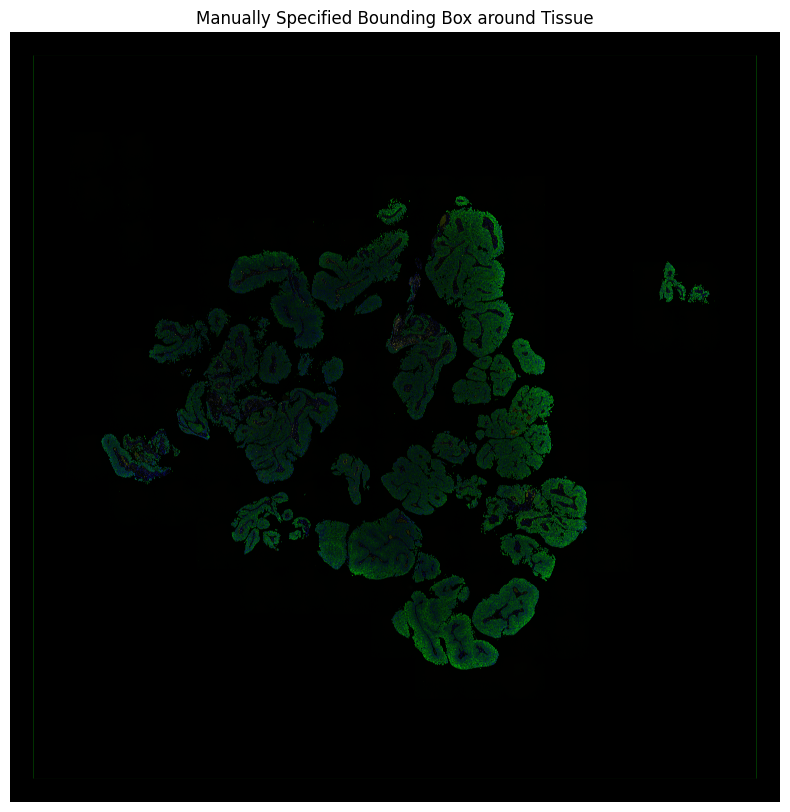

Manually specified bounding box coordinates: x=1000, y=1000, width=30768, height=30768
Image with manually specified bounding box has been saved for verification.
Extracted 2401 patches.
Deleted patch: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/ome-png/16_patches/patch_1000_1000.png
Deleted patch: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/ome-png/16_patches/patch_1000_1640.png
Deleted patch: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/ome-png/16_patches/patch_1000_2280.png
Deleted patch: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/ome-png/16_patches/patch_1000_2920.png
Deleted patch: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/ome-png/16_patches/patch_1000_3560.png
Deleted patch: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/ome-png/16_patches/patch_1000_4200.png
Deleted patch: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/ome-png/16_patches/patch_1000_4840.png
Deleted patch: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/ome-png/16_patches/p

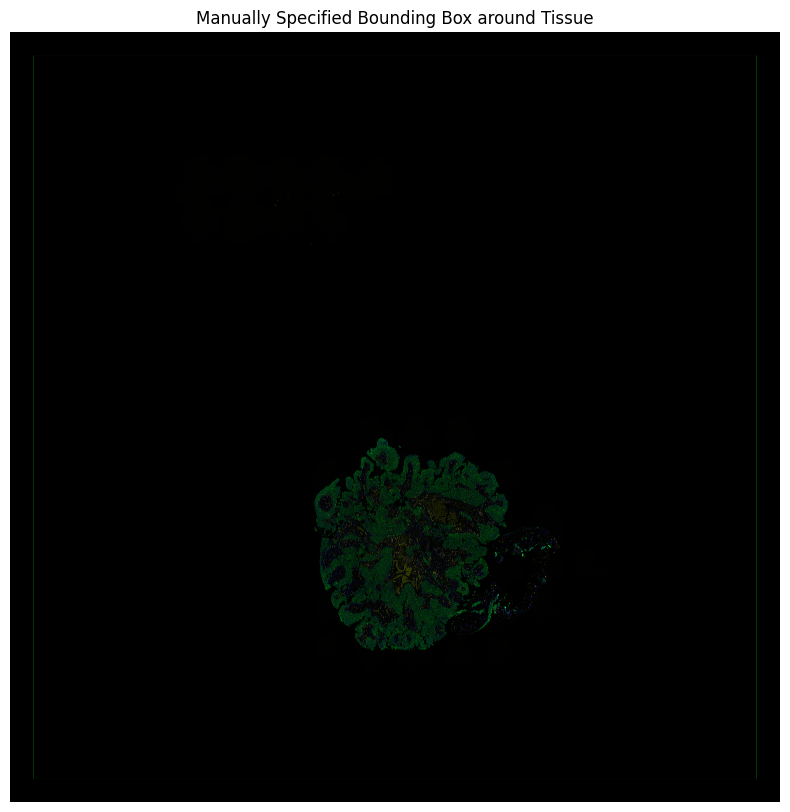

Manually specified bounding box coordinates: x=1000, y=1000, width=30768, height=30768
Image with manually specified bounding box has been saved for verification.
Extracted 2401 patches.
Deleted patch: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/ome-png/18_patches/patch_1000_1000.png
Deleted patch: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/ome-png/18_patches/patch_1000_1640.png
Deleted patch: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/ome-png/18_patches/patch_1000_2280.png
Deleted patch: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/ome-png/18_patches/patch_1000_2920.png
Deleted patch: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/ome-png/18_patches/patch_1000_3560.png
Deleted patch: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/ome-png/18_patches/patch_1000_4200.png
Deleted patch: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/ome-png/18_patches/patch_1000_4840.png
Deleted patch: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/ome-png/18_patches/p

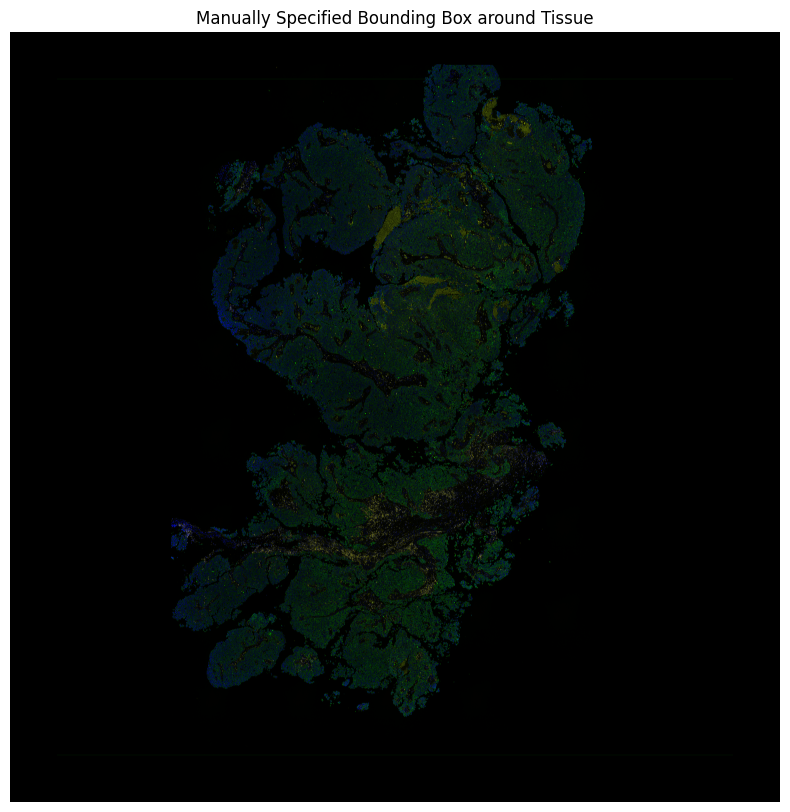

Manually specified bounding box coordinates: x=1000, y=1000, width=14384, height=14384
Image with manually specified bounding box has been saved for verification.
Extracted 529 patches.
Deleted patch: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/ome-png/23_patches/patch_1000_1000.png
Deleted patch: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/ome-png/23_patches/patch_1000_1640.png
Deleted patch: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/ome-png/23_patches/patch_1000_2280.png
Deleted patch: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/ome-png/23_patches/patch_1000_2920.png
Deleted patch: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/ome-png/23_patches/patch_1000_3560.png
Deleted patch: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/ome-png/23_patches/patch_1000_4200.png
Deleted patch: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/ome-png/23_patches/patch_1000_4840.png
Deleted patch: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/ome-png/23_patches/pa

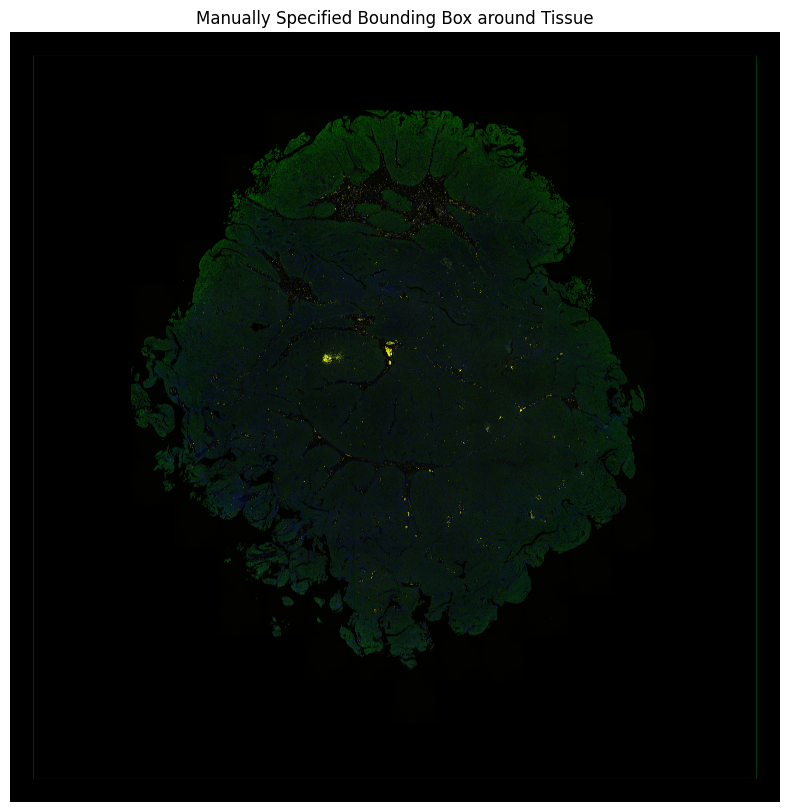

Manually specified bounding box coordinates: x=1000, y=1000, width=30768, height=30768
Image with manually specified bounding box has been saved for verification.
Extracted 2401 patches.
Deleted patch: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/ome-png/28_patches/patch_1000_1000.png
Deleted patch: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/ome-png/28_patches/patch_1000_1640.png
Deleted patch: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/ome-png/28_patches/patch_1000_2280.png
Deleted patch: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/ome-png/28_patches/patch_1000_2920.png
Deleted patch: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/ome-png/28_patches/patch_1000_3560.png
Deleted patch: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/ome-png/28_patches/patch_1000_4200.png
Deleted patch: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/ome-png/28_patches/patch_1000_4840.png
Deleted patch: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/ome-png/28_patches/p

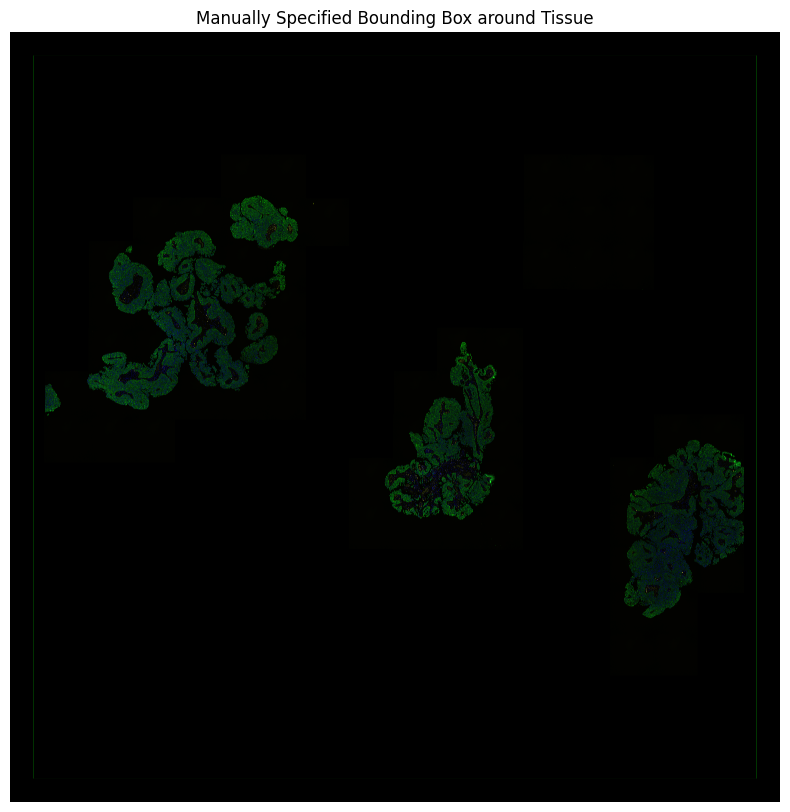

Manually specified bounding box coordinates: x=1000, y=1000, width=30768, height=30768
Image with manually specified bounding box has been saved for verification.
Extracted 2401 patches.
Deleted patch: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/ome-png/29_patches/patch_1000_1000.png
Deleted patch: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/ome-png/29_patches/patch_1000_1640.png
Deleted patch: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/ome-png/29_patches/patch_1000_2280.png
Deleted patch: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/ome-png/29_patches/patch_1000_2920.png
Deleted patch: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/ome-png/29_patches/patch_1000_3560.png
Deleted patch: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/ome-png/29_patches/patch_1000_4200.png
Deleted patch: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/ome-png/29_patches/patch_1000_4840.png
Deleted patch: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/ome-png/29_patches/p

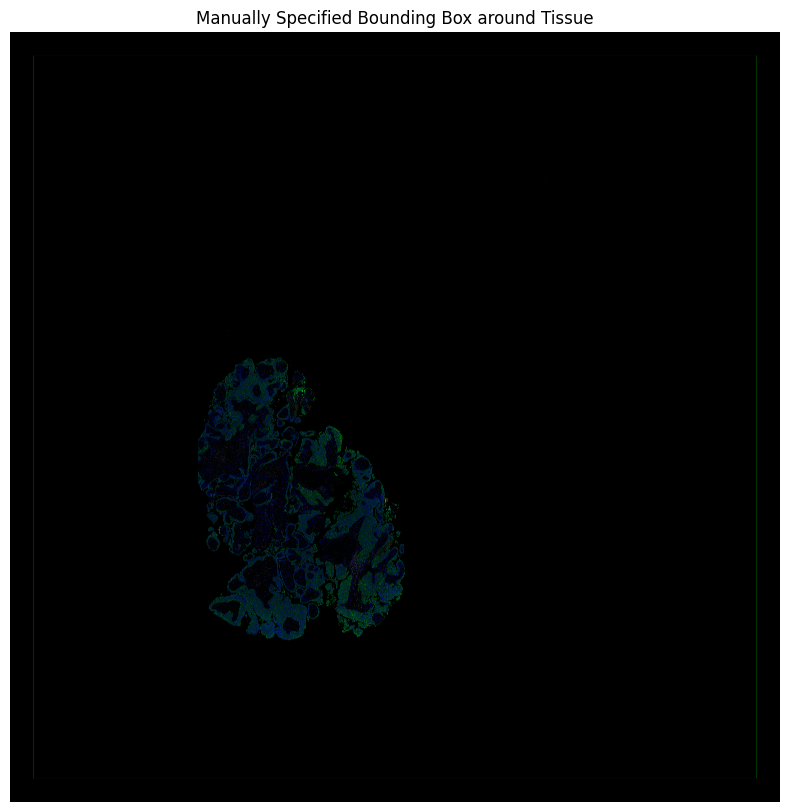

Manually specified bounding box coordinates: x=1000, y=1000, width=30768, height=30768
Image with manually specified bounding box has been saved for verification.
Extracted 2401 patches.
Deleted patch: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/ome-png/35_patches/patch_1000_1000.png
Deleted patch: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/ome-png/35_patches/patch_1000_1640.png
Deleted patch: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/ome-png/35_patches/patch_1000_2280.png
Deleted patch: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/ome-png/35_patches/patch_1000_2920.png
Deleted patch: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/ome-png/35_patches/patch_1000_3560.png
Deleted patch: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/ome-png/35_patches/patch_1000_4200.png
Deleted patch: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/ome-png/35_patches/patch_1000_4840.png
Deleted patch: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/ome-png/35_patches/p

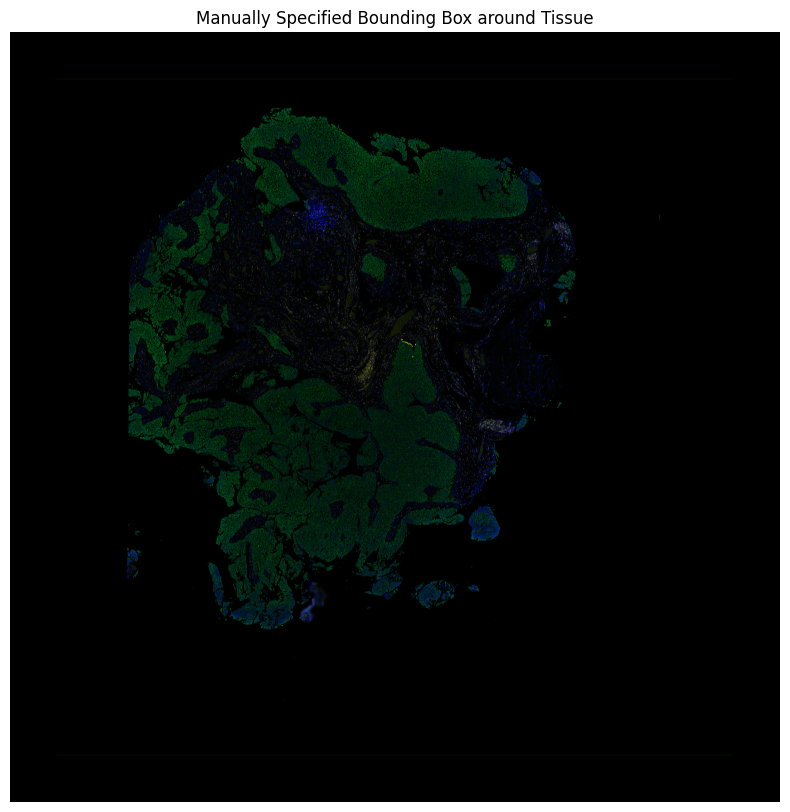

Manually specified bounding box coordinates: x=1000, y=1000, width=14384, height=14384
Image with manually specified bounding box has been saved for verification.
Extracted 529 patches.
Deleted patch: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/ome-png/38_patches/patch_1000_1000.png
Deleted patch: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/ome-png/38_patches/patch_1000_1640.png
Deleted patch: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/ome-png/38_patches/patch_1000_2280.png
Deleted patch: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/ome-png/38_patches/patch_1000_2920.png
Deleted patch: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/ome-png/38_patches/patch_1000_3560.png
Deleted patch: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/ome-png/38_patches/patch_1000_4200.png
Deleted patch: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/ome-png/38_patches/patch_1000_4840.png
Deleted patch: /rsrch5/home/plm/yshokrollahi/project4/RawDataset/ome-png/38_patches/pa

In [ ]:
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt
import os

Image.MAX_IMAGE_PIXELS = None
nums = [16, 18, 23, 28, 29, 35, 38, 44, 66, 79]

for i in nums:
    img_name = f"MS0{i}S1"
    print(img_name)
    
    # Paths
    root = "/rsrch5/home/plm/yshokrollahi/project4/RawDataset/ome-png"
    png_image_path = f"{root}/{img_name}.png"
    output_folder = f"{root}/{i}_patches"
    
    # Ensure the output directory exists
    os.makedirs(output_folder, exist_ok=True)
    
    # Read the PNG image using PIL
    image_pil = Image.open(png_image_path)
    image = np.array(image_pil)
    
    # Determine image dimensions
    img_height, img_width = image.shape[:2]
    
    # Manually specify the bounding box coordinates with 1000-pixel padding
    x, y = 1000, 1000  # Top-left corner
    w = img_width - 2000  # Width of the bounding box
    h = img_height - 2000  # Height of the bounding box
    
    # Draw the bounding box on the image for visualization using PIL
    image_with_box_pil = image_pil.copy()
    draw = ImageDraw.Draw(image_with_box_pil)
    draw.rectangle([x, y, x+w, y+h], outline="green", width=2)
    
    plt.figure(figsize=(10, 10))
    plt.imshow(image_with_box_pil)
    plt.title("Manually Specified Bounding Box around Tissue")
    plt.axis("off")
    plt.show()
    
    # Save the image with bounding box for verification using PIL
    image_with_box_pil.save(os.path.join(output_folder, "image_with_manual_box.png"))
    
    print(f"Manually specified bounding box coordinates: x={x}, y={y}, width={w}, height={h}")
    print("Image with manually specified bounding box has been saved for verification.")
    
    # Define patch size
    patch_size = 640
    
    # Function to extract patches
    def extract_patches(image, x, y, w, h, patch_size):
        patches = []
        patch_coords = []
        for i in range(y, y+h, patch_size):
            for j in range(x, x+w, patch_size):
                if i + patch_size > y + h:  # If patch exceeds the tissue region in height
                    i = y + h - patch_size
                if j + patch_size > x + w:  # If patch exceeds the tissue region in width
                    j = x + w - patch_size
                patch = image[i:i+patch_size, j:j+patch_size]
                patches.append(patch)
                patch_coords.append((i, j))
                # Save the patch as a separate file using PIL
                patch_image = Image.fromarray(patch)
                patch_filename = f"patch_{i}_{j}.png"
                patch_output_path = os.path.join(output_folder, patch_filename)
                patch_image.save(patch_output_path)
                if j + patch_size >= x + w:  # Move to the next row if patch exceeds width
                    break
            if i + patch_size >= y + h:  # End if patch exceeds height
                break
        return patches, patch_coords
    
    # Extract patches
    patches, patch_coords = extract_patches(image, x, y, w, h, patch_size)
    
    print(f"Extracted {len(patches)} patches.")
    
    # Function to check if a patch is completely black
    def is_patch_black(patch):
        return np.all(patch == 0)
    
    # Delete completely black patches and patches under 300 KB
    size_threshold = 300 * 1024  # 300 KB in bytes
    
    for j, (patch, coords) in enumerate(zip(patches, patch_coords)):
        patch_filename = f"patch_{coords[0]}_{coords[1]}.png"
        patch_output_path = os.path.join(output_folder, patch_filename)
        if is_patch_black(patch) or os.path.getsize(patch_output_path) < size_threshold:
            os.remove(patch_output_path)
            print(f"Deleted patch: {patch_output_path}")
    
    print("Black patches and patches under 300 KB have been deleted.")
    
    # Rename remaining patches
    remaining_patches_files = sorted([f for f in os.listdir(output_folder) if f.startswith("patch_")])
    for idx, filename in enumerate(remaining_patches_files, start=1):
        old_path = os.path.join(output_folder, filename)
        new_filename = f"{img_name}_roi_{idx}.png"
        new_path = os.path.join(output_folder, new_filename)
        os.rename(old_path, new_path)
        print(f"Renamed {old_path} to {new_path}")
    
    print("Remaining patches have been renamed.")
    
    # # Visualize some of the remaining patches
    # for idx, patch_filename in enumerate(remaining_patches_files[:5]):
    #     patch_path = os.path.join(output_folder, f"{img_name}_roi_{idx + 1}.png")
    #     patch = Image.open(patch_path)
    #     plt.figure(figsize=(5, 5))
    #     plt.imshow(patch)
    #     plt.title(f"Remaining Patch {idx + 1}")
    #     plt.axis("off")
    #     plt.show()
